In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from skfeature.function.similarity_based import fisher_score

In [4]:
df2 = pd.read_csv('../../csv/human/csv_human-2.csv')
df2.to_csv('../../csv/cfinal1.csv', index=False)
df1=pd.read_csv('../../csv/gpt/csv_gpt3-2.csv')
df1.to_csv('../../csv/cfinal1.csv',mode='a',header=None,index=False) 

In [3]:
df3=pd.read_csv('../../csv/cfinal1.csv')
df3 = df3.sample(frac = 1)

In [3]:
print(f"The number of columns in the CSV file is: {df3.shape[1]}")

The number of columns in the CSV file is: 37


In [4]:
data = pd.read_csv('../../csv/cfinal1.csv')
X = data.iloc[:,2:36]  #independent columns
x = X.drop(columns=['word_sim_n_score'])
y = data.iloc[:,-1]   

In [7]:
x
#y

,para_count,word_count,sentence_count,sentence_len(mean),sentence_len(max),sentence_len(min),sw_rates,unique_words,unique_words_rates,noun,...,word_sim_score,flesch grade,Automated Readability,coleman_liau,cohesion score,positive_sentiment,negative_sentiment,neutral_sentiment,discourse_marker,grammar
0,5.0,388.0,20.0,19.400000,38.0,12.0,9.650000,199.0,0.444186,0.306701,...,149.920911,12.0,13.9,13.69,4.182405,0.100,0.066,0.834,49.0,3.0
1,5.0,280.0,16.0,17.500000,38.0,10.0,8.937500,178.0,0.532915,0.296429,...,108.484310,8.9,11.1,10.84,4.028763,0.053,0.282,0.664,32.0,3.0
2,4.0,256.0,15.0,17.066667,24.0,8.0,9.000000,138.0,0.480287,0.261719,...,107.812128,11.1,11.5,11.83,3.702329,0.173,0.026,0.801,28.0,1.0
3,6.0,380.0,18.0,21.111111,38.0,10.0,11.222222,223.0,0.486047,0.257895,...,160.342955,11.5,12.8,11.08,4.393480,0.198,0.038,0.764,47.0,3.0
4,4.0,372.0,15.0,24.800000,42.0,14.0,11.800000,227.0,0.544118,0.244624,...,146.473232,11.8,15.9,13.18,4.533942,0.160,0.053,0.786,55.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6.0,489.0,24.0,20.375000,29.0,11.0,8.458333,248.0,0.431734,0.325153,...,188.424704,14.8,17.3,17.11,4.123819,0.202,0.026,0.771,74.0,1.0
296,7.0,518.0,28.0,18.500000,34.0,10.0,7.750000,269.0,0.433447,0.335907,...,203.371922,11.7,14.7,15.03,4.384492,0.090,0.093,0.817,71.0,0.0
297,6.0,426.0,23.0,18.521739,26.0,10.0,6.217391,254.0,0.477551,0.340376,...,162.670376,16.4,19.2,20.36,4.261948,0.170,0.050,0.780,60.0,0.0
298,6.0,394.0,21.0,18.761905,29.0,9.0,7.857143,227.0,0.494382,0.284264,...,142.686998,13.0,15.2,15.49,4.585976,0.219,0.037,0.744,55.0,0.0


In [15]:
import pandas as pd
import scipy.stats as stats

df2 = pd.read_csv('../../csv/human/csv_human-2.csv')
df1=pd.read_csv('../../csv/gpt/csv_gpt3-2.csv')

# Drop the target column 'Class' from both DataFrames
data1 = df1.drop(columns=['label'])
data2 = df2.drop(columns=['label'])

# Perform the Wilcoxon rank-sum test for each feature
results = {}
for feature in data1.columns:
    statistic, p_value = stats.ranksums(data1[feature], data2[feature])
    results[feature] = {'Wilcoxon rank-sum statistic': statistic, 'P-value': p_value}

sorted_results = sorted(results.items(), key=lambda x: x[1]['Wilcoxon rank-sum statistic'], reverse=True)

# Display the results for each feature
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"Wilcoxon rank-sum statistic: {result['Wilcoxon rank-sum statistic']}")
    print(f"P-value: {result['P-value']}")

# Set your significance level (alpha) and make a decision
alpha = 0.05

significant_features = [feature for feature, result in results.items() if result['P-value'] < alpha]
print("Significant features:", significant_features)
print("number of significant features ",len(significant_features))

Feature: essay
Wilcoxon rank-sum statistic: -1.0302842880902894
P-value: 0.3028765724597571
Feature: topic
Wilcoxon rank-sum statistic: 0.06123136595885441
P-value: 0.9511749501677654
Feature: para_count
Wilcoxon rank-sum statistic: 12.332795774104046
P-value: 6.031701026206971e-35
Feature: word_count
Wilcoxon rank-sum statistic: 11.143443046185862
P-value: 7.708060460101128e-29
Feature: sentence_count
Wilcoxon rank-sum statistic: 9.836952052955088
P-value: 7.803927086263536e-23
Feature: sentence_len(mean)
Wilcoxon rank-sum statistic: -2.698839010469072
P-value: 0.006958182757862988
Feature: sentence_len(max)
Wilcoxon rank-sum statistic: -5.859575498932111
P-value: 4.640518741546976e-09
Feature: sentence_len(min)
Wilcoxon rank-sum statistic: 1.6399357143762745
P-value: 0.10101853406053538
Feature: sw_rates
Wilcoxon rank-sum statistic: -7.956749783022874
P-value: 1.7661737798124844e-15
Feature: unique_words
Wilcoxon rank-sum statistic: 7.337780540177933
P-value: 2.1716486733373905e-13
F

In [12]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [13]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [14]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns

In [15]:
featureScores

,features,Score
0,para_count,29.803353
1,word_count,1324.487872
2,sentence_count,78.741866
3,sentence_len(mean),4.371057
4,sentence_len(max),80.929551
5,sentence_len(min),0.536553
6,sw_rates,29.766527
7,unique_words,218.667883
8,unique_words_rates,0.728811
9,noun,0.483841


In [16]:
print(featureScores.nlargest(10,'Score')) 

                        features        Score
20              word_sim_p_count  1397.485748
1                     word_count  1324.487872
16         number_of_repeatation   612.370809
32                       grammar   325.716141
23                word_sim_score   313.725139
21              word_sim_p_score   312.001158
31              discourse_marker   297.474466
7                   unique_words   218.667883
14  occurrance_of_most_freq_word   150.968049
4              sentence_len(max)    80.929551


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08394678 0.04464721 0.03017157 0.01851873 0.00937696 0.02441978
 0.0086929  0.01178871 0.03674086 0.01055636 0.05925216 0.01417942
 0.01015902 0.04028153 0.00604591 0.02562909 0.03001187 0.04471977
 0.01603766 0.09263421 0.01285698 0.00794496 0.00597401 0.03494101
 0.02345946 0.00702857 0.02765454 0.03181269 0.03929654 0.07061171
 0.00869803 0.05364106 0.0120047  0.00660433 0.00590752 0.03375339]


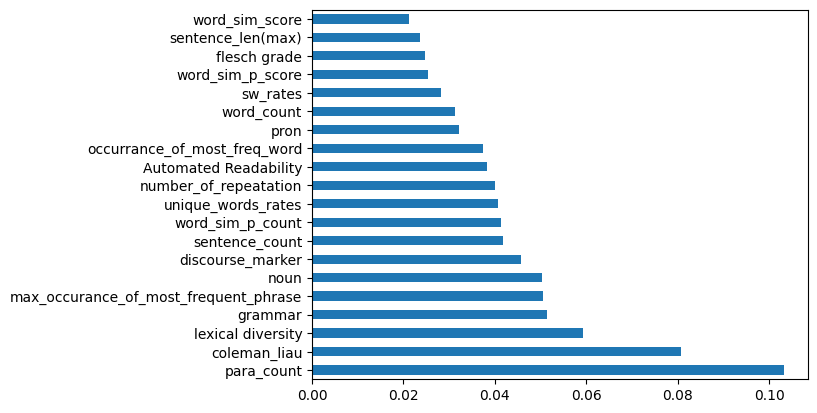

In [8]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.093116   0.04448277 0.02986543 0.01141044 0.02129633 0.00703159
 0.03938813 0.01593177 0.06604789 0.04695186 0.01101548 0.01046686
 0.02903813 0.00476025 0.0316602  0.0048713  0.0372801  0.04407781
 0.0171066  0.05957698 0.04843276 0.03025613 0.00839698 0.00611834
 0.02177541 0.02269919 0.03802163 0.07196884 0.00511924 0.00870525
 0.00599101 0.0087332  0.04217193 0.05623416]


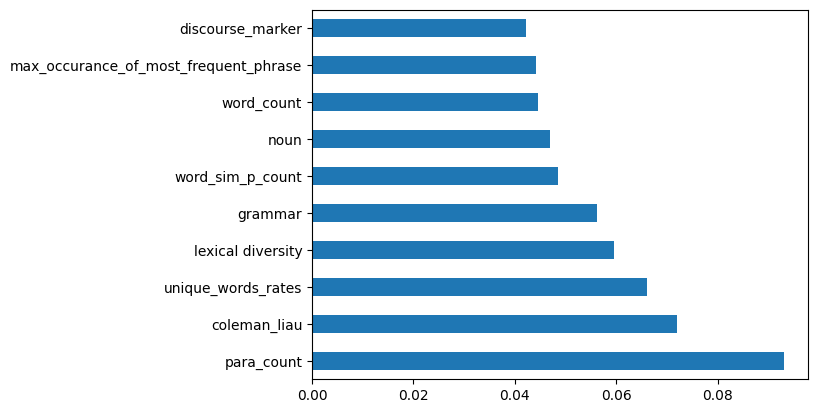

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.08204503 0.04433961 0.04087724 0.01226445 0.02123481 0.00676569
 0.04032189 0.01362722 0.07438532 0.03396722 0.01433106 0.00972169
 0.03656569 0.00623459 0.02749367 0.00413084 0.03720175 0.0502039
 0.01398928 0.06082441 0.03632559 0.02220073 0.00885896 0.0279298
 0.02912701 0.03651262 0.09603348 0.00853015 0.00991639 0.00527297
 0.00848867 0.02377482 0.05650344]


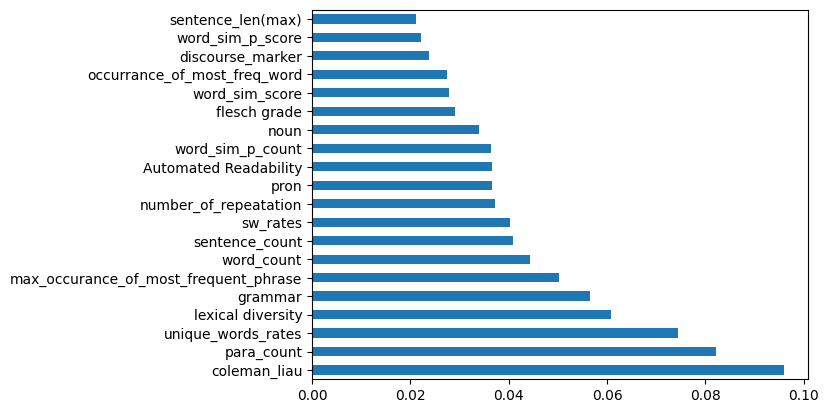

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

/tmp/ipykernel_3088735/3513936419.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


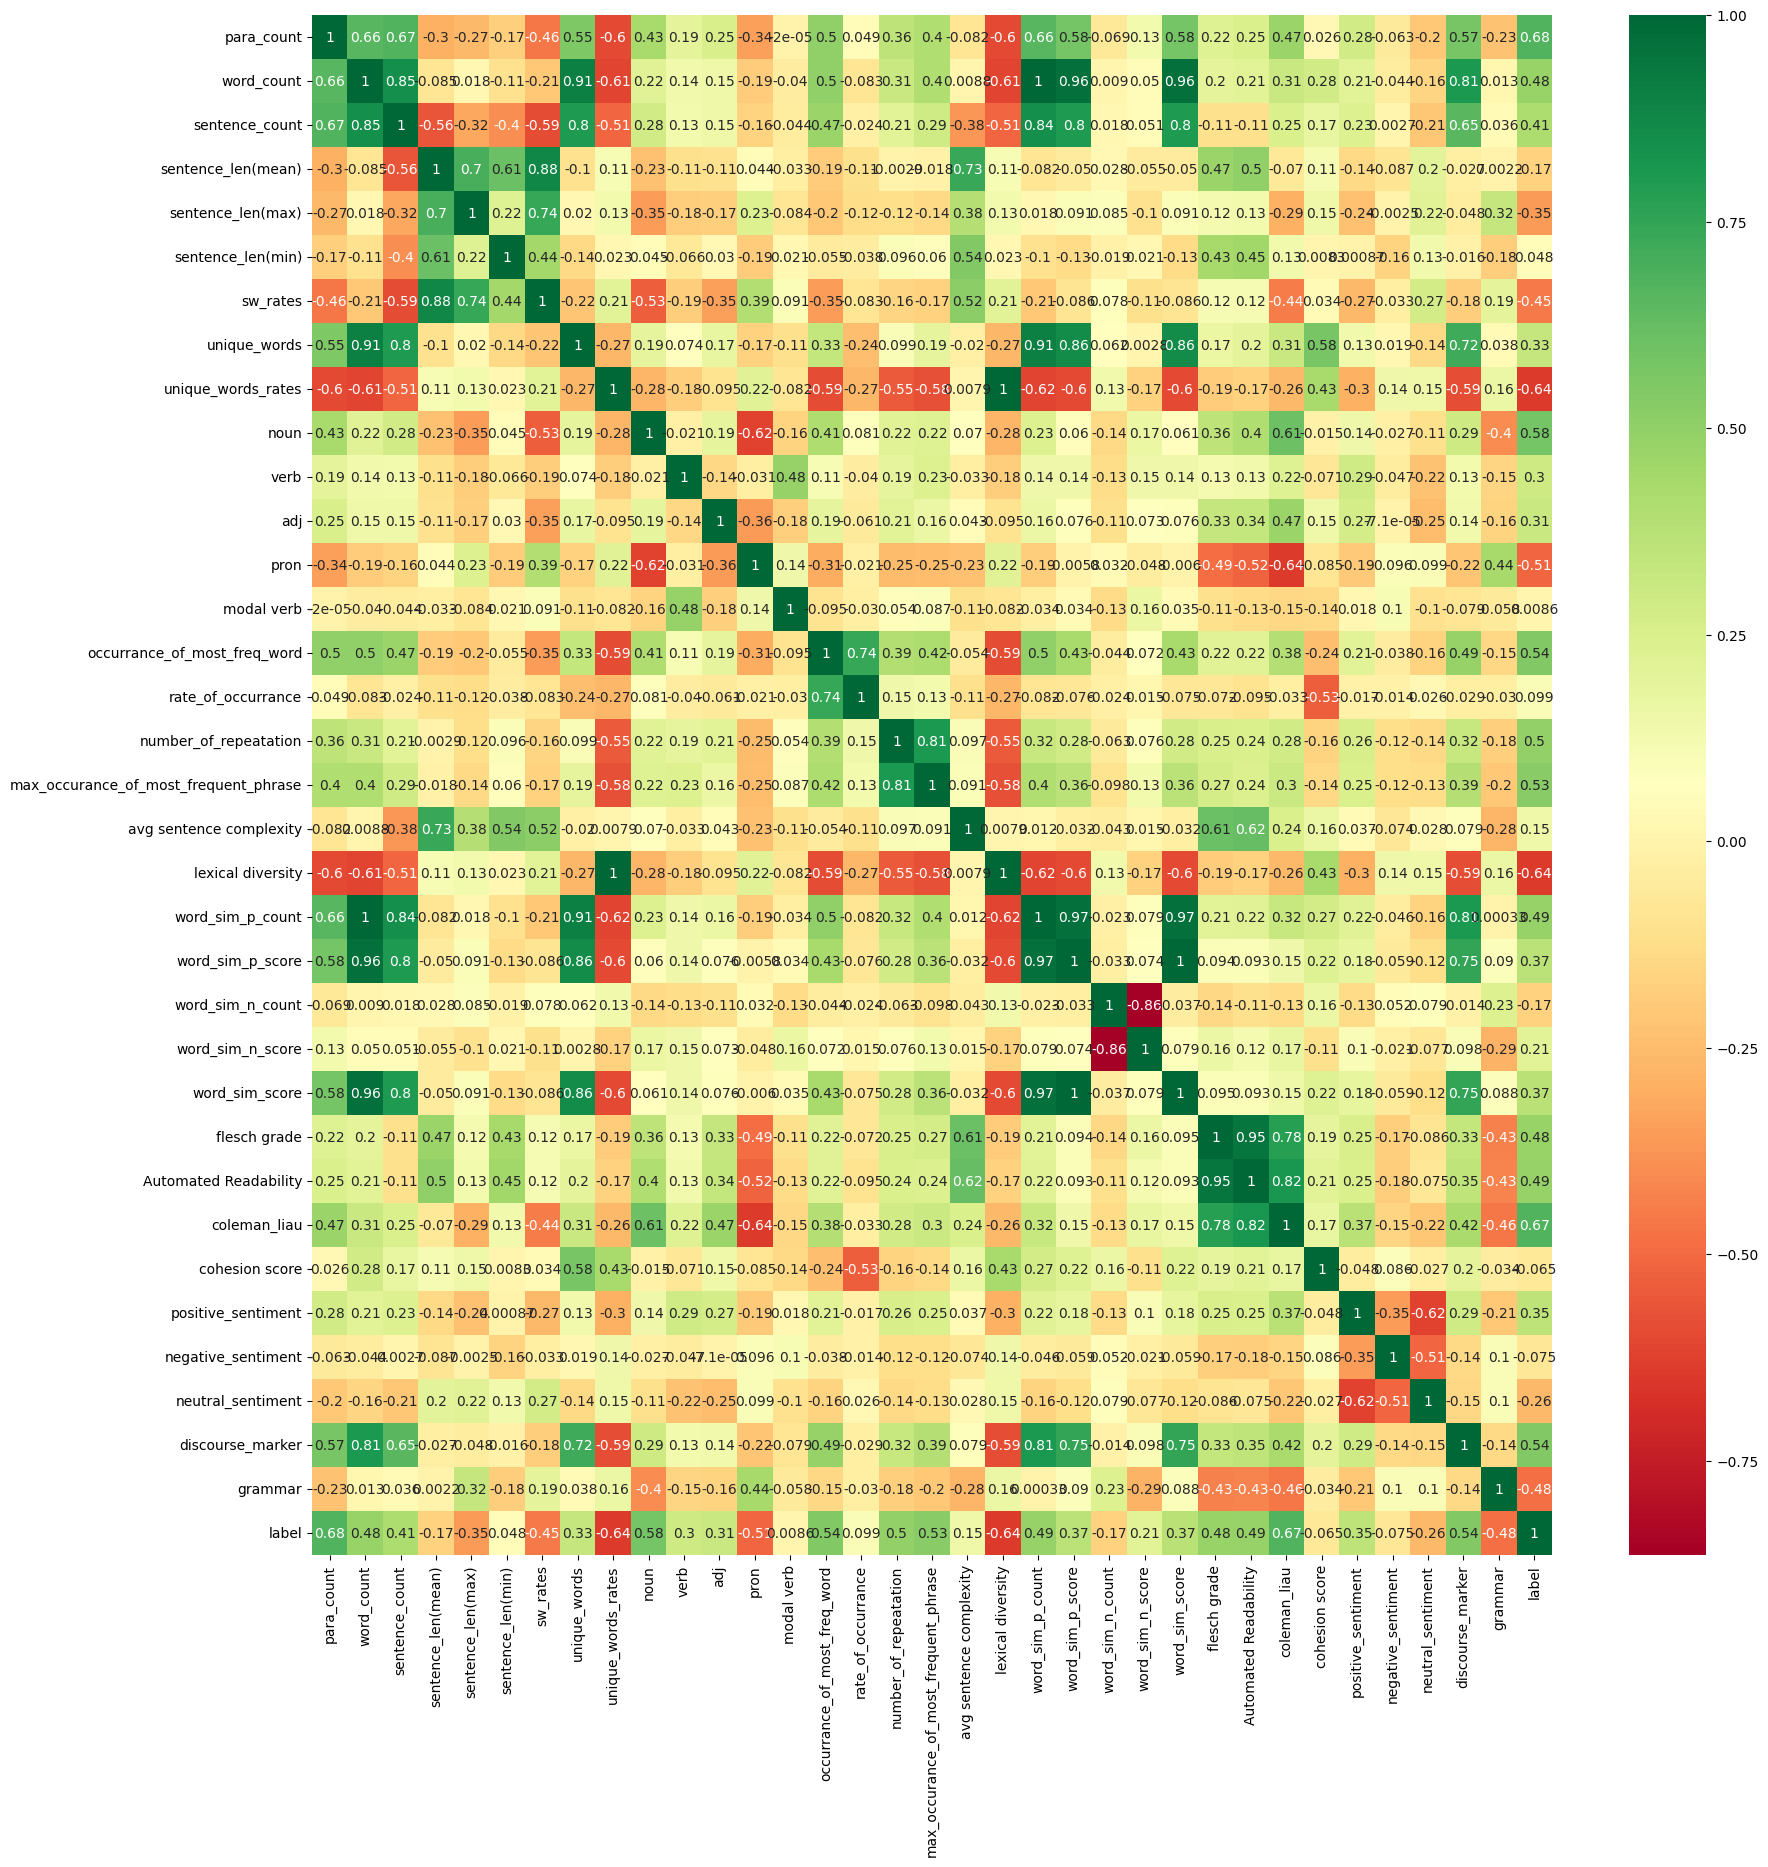

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")